## Dummy classifier e Árvores de decisão

In [36]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [16]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [17]:
map = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}

df = df.rename(columns = map)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [18]:
# Mudar yes ou no para 0 e 1 

change_values = {
    'no': 0,
    'yes': 1
}

df.vendido = df.vendido.map(change_values)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [19]:
from datetime import datetime

current_year = datetime.today().year
df['idade_do_modelo'] = current_year - df.ano_do_modelo
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [21]:
df['km_por_ano'] = df.milhas_por_ano * 1.60934
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [22]:
# Por padrão o pandas dropa as linhas, é preciso especificar
# o eixo caso queira colunas
df = df.drop(columns = ["Unnamed: 0","milhas_por_ano","ano_do_modelo"], axis = 1)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [23]:
x = df[["preco", "idade_do_modelo","km_por_ano"]]
y = df["vendido"]



In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 20
np.random.seed(SEED) # as duas libs utilizam o random do numpy para gerar
# números pseudo-aleatorios

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    stratify = y)
model = LinearSVC()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions) * 100
print("Acuracia: {:.2f}%".format(accuracy))

Acuracia: 57.88%


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
# Testando dummy classifier para baseline
# o dummy classifier utiliza o stratefied como padrão

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x_train, y_train)
accuracy = dummy.score(x_test, y_test) * 100
print("DummyClassifier Acuracia: {:.2f}%".format(accuracy))

DummyClassifier Acuracia: 51.24%


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


# Utilizando SVC
## Os dados devem ser reescalados

- P.S.:Classificadores baseados em SVM são caixa pretas, não possuem tanta transparencia em entender o que estão fazendo e como estão fazendo

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20
np.random.seed(SEED) # as duas libs utilizam o random do numpy para gerar
# números pseudo-aleatorios

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    stratify = y)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test) * 100
print("Acuracia: {:.2f}%".format(accuracy))

Acuracia: 75.92%


# Utilizando Árvore de Decisão (Decision tree)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20
np.random.seed(SEED) # as duas libs utilizam o random do numpy para gerar
# números pseudo-aleatorios

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                  stratify = y)

# ARVORES DE DECISÃO FUNCIONAM BEM MESMO EM ESCALAS DIFERENTES

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(raw_x_train)
# x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test) * 100
print("Acuracia: {:.2f}%".format(accuracy))

Acuracia: 75.84%


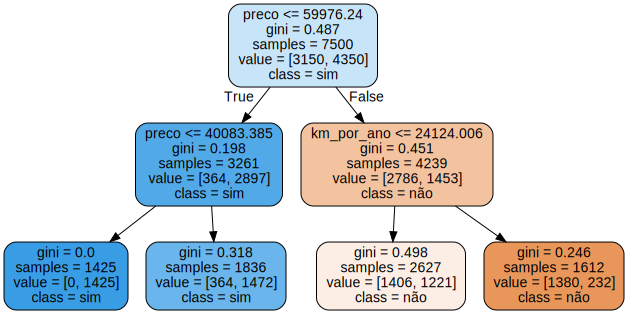

In [57]:
# Entendendo as regras de decisão da árvore

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(
    model, 
    out_file = None,
    feature_names = features,
    rounded = True, 
    filled = True,
    class_names = ["não","sim"],
     # Mostrar valor real
    ) # Retorna um grafico chamado de dot
graphic = graphviz.Source(dot_data)
graphic